In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf

In [4]:
df=pd.read_csv("IMDB Dataset.csv")

In [5]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df["review"]=df["review"].str.lower()
df["review"]=df["review"].str.replace('[^\w\s]','')
df["review"]=df["review"].str.replace('\d+','')
df["review"]=df["review"].str.replace('\n',' ').replace('\r',' ')

In [15]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [16]:
d={"positive":1,"negative":0}
df["sentiment"]=df["sentiment"].map(d)

In [17]:
df.head(3)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1


In [19]:
x=df.review
y=df.sentiment

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
vect=CountVectorizer(lowercase=True,stop_words='english')
x_yeni=vect.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [23]:
print(x_yeni)

  (0, 129379)	1
  (0, 96792)	1
  (0, 168891)	2
  (0, 81706)	2
  (0, 112622)	5
  (0, 48988)	2
  (0, 174843)	1
  (0, 72109)	1
  (0, 130026)	2
  (0, 50454)	1
  (0, 67592)	1
  (0, 95959)	1
  (0, 18499)	3
  (0, 155742)	1
  (0, 149178)	2
  (0, 19992)	1
  (0, 163284)	1
  (0, 134680)	1
  (0, 167025)	4
  (0, 138048)	1
  (0, 172735)	1
  (0, 160573)	1
  (0, 52308)	1
  (0, 68882)	1
  (0, 157272)	1
  :	:
  (49999, 163333)	1
  (49999, 87211)	1
  (49999, 77571)	1
  (49999, 51140)	1
  (49999, 10149)	1
  (49999, 67805)	1
  (49999, 104569)	1
  (49999, 75870)	1
  (49999, 75386)	1
  (49999, 52776)	1
  (49999, 8309)	1
  (49999, 159792)	1
  (49999, 83820)	1
  (49999, 145937)	1
  (49999, 95407)	1
  (49999, 128181)	1
  (49999, 49005)	1
  (49999, 21603)	1
  (49999, 25091)	1
  (49999, 51178)	1
  (49999, 63624)	1
  (49999, 128161)	1
  (49999, 102268)	1
  (49999, 34363)	1
  (49999, 174765)	1


In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mb=MultinomialNB()

In [26]:
mb.fit(x_train,y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
tahmin=mb.predict(x_test)

In [29]:
accuracy_score(y_test,tahmin)

0.85776

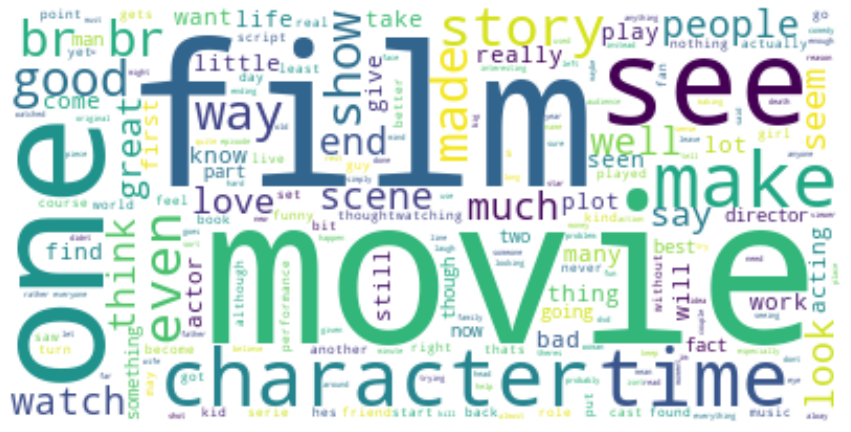

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()